# Winter 2021 Data Science Intern Challenge 

#  Question 1

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv')

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
3,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [4]:
data.shape

(5000, 7)

In [5]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

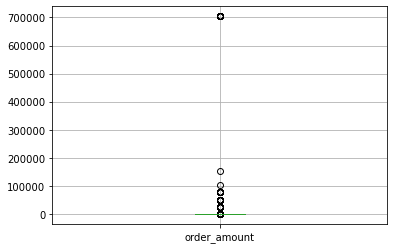

In [6]:
data.boxplot(column='order_amount')

### Observation
The AOV of 3145.13 used in your calculation is gotten from the **average/mean** of the total order amount ie. total sales divided by the number of orders.

The plot above shows there are outliers that are very high in the order_amount column

The **outliers** in the order_amount column are making the mean skewed which is why **the AOV is so high**. 

In [7]:
order_amount_counts = data.groupby(['order_amount']).size().reset_index(name='counts') \
                        .sort_values(by='order_amount', ascending=False)
order_amount_counts.head(10)

,order_amount,counts
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [8]:
amount_704000 = data.loc[data['order_amount'] == 704000]
amount_704000

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
3,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
5,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
6,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
7,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
8,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
9,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


## Observation
There is a particular user (**user_id 607**) who shopped at the same place (**shop_id 42**) spending exactly the same amount of **704000** with same quantity (**total_items 2000**) in each transaction at the same time (**4 AM**). There are some cases of duplicates where the transaction is recorded at the same day which could be an error in data entry or that the user is intentionally inflating the sales at this particular shop for a personal reason (reselling, hoarding).

In [9]:
#Get average item amount in an order
data['avg_order_item_amount'] = data['order_amount'] / data['total_items']

data.groupby('total_items').agg(
    # Get mean order amount for each group
    mean_order_amount = ('order_amount', 'mean'),
    # Get maximum order amount for each group
    max_order_amount = ('order_amount', 'max') 
)

,mean_order_amount,max_order_amount
total_items,,
1,417.364481,25725
2,750.215066,51450
3,1191.076514,77175
4,947.686007,102900
5,759.350649,1760
6,17940.000000,154350
8,1064.000000,1064
2000,704000.000000,704000


In [10]:
data.loc[data['order_amount'].isin([25725, 51450, 77175, 102900, 154350])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_order_item_amount
17,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
18,2493,78,834,102900,4,debit,2017-03-04 4:37:34,25725.0
23,4716,78,818,77175,3,debit,2017-03-05 5:10:44,25725.0
27,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
25,3404,78,928,77175,3,debit,2017-03-16 9:45:05,25725.0
24,2565,78,915,77175,3,debit,2017-03-25 1:19:35,25725.0
26,2691,78,962,77175,3,debit,2017-03-22 7:33:25,25725.0
22,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
21,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32,25725.0
20,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


## Observation
There were very high order_amount for the purchases of 1 item, 2 items, 3 items, 4 items and 6 items. These were recorded at a particular shop (**78**), this could be an error in the price used by the store because the average order_amount based for each record against the number of items sold is **25725** per shoe which is high compared to the price of the shoes in the dataset.

## Answers

a) As seen from the observations above the calculated AOV was affected by the various outlier values in this dataset, both from the 2000 item purchases and the item amounts that were 25725. 

b) I would use the **median of the dataset** as the AOV Metric as this is robust to outliers

c) The value using the median of the order_amount is **$284.00**

# Question 2

## How many orders were shipped by Speedy Express in total?
```
SELECT COUNT(o.OrderID) AS totalOrders
FROM Orders o
JOIN Shippers s
ON o.ShipperID = s.shipperID
WHERE s.ShipperName= "Speedy Express";
```

Answer: **54**

## What is the last name of the employee with the most orders?

```
SELECT e.LastName, COUNT(o.OrderID) AS totalOrders
FROM Orders o
JOIN Employees e
ON e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY totalOrders DESC
LIMIT 1;
```

Answer: **Peacock** was the last name of the employee with the most orders

## What product was ordered the most by customers in Germany?
```
SELECT p.ProductID, p.ProductName, SUM(d.quantity) AS orderTotal
FROM Orders o
JOIN Customers c ON c.CustomerID = o.CustomerID
JOIN OrderDetails d ON d.OrderID = o.OrderID
JOIN Products p ON d.ProductID = p.ProductID
WHERE c.Country = "Germany"
GROUP BY p.ProductID
ORDER BY orderTotal DESC
LIMIT 1;
```
Answer: **Boston Crab Meat** was ordered the most by customers in Germany
(ProductID: 40, orderTotal: 160)